# 数据聚合与分组运算

## GroupBy技术

In [1]:
from pandas import DataFrame, Series

In [2]:
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [5]:
df

,data1,data2,key1,key2
0,0.489129,1.102114,a,one
1,0.809346,-1.037586,a,two
2,-0.745074,1.218139,b,one
3,0.609672,0.403819,b,two
4,1.340669,-0.665696,a,one


#### 按key1进行分组，并计算data1列的平均值

In [14]:
# 访问data1，并根据key1调用groupby
grouped = df['data1'].groupby(df['key1'])

In [15]:
grouped

In [16]:
# 返回的是GroupBy对象，实际还没用进行任何计算，只是含有一些关于分组键df['key1']的中间数据而已。
# 即该对象已经有了接下来对各分组执行运算所需的一切信息
grouped.mean()

key1
a    0.879715
b   -0.067701
Name: data1, dtype: float64

In [19]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()   # 传入多个数组

In [20]:
means  # 通过两个键对数据进行了分组

key1  key2
a     one     0.914899
      two     0.809346
b     one    -0.745074
      two     0.609672
Name: data1, dtype: float64

In [23]:
means.unstack()

key2,one,two
key1,,
a,0.914899,0.809346
b,-0.745074,0.609672


In [24]:
# 在上面的例子中，分组键均为Series，其实分组键也可以是任何长度适当的数组
states = np.array(['Ohio', 'California', 'California', 'Phio', 'Ohio'])

In [25]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [27]:
df['data1'].groupby([states, years]).mean()

California  2005    0.809346
            2006   -0.745074
Ohio        2005    0.489129
            2006    1.340669
Phio        2005    0.609672
Name: data1, dtype: float64

In [28]:
# 也可以将列名（可以是字符串、数组或其他Python对象）用作分组键：
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.879715,-0.200389
b,-0.067701,0.810979


In [33]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.914899  0.218209
     two   0.809346 -1.037586
b    one  -0.745074  1.218139
     two   0.609672  0.403819

#### GroupBy的size方法返回一个含有分组大小的Series：

In [31]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

#### 对分组进行迭代

In [34]:
for name, group in df.groupby('key1'):
    print name
    print group

a
      data1     data2 key1 key2
0  0.489129  1.102114    a  one
1  0.809346 -1.037586    a  two
4  1.340669 -0.665696    a  one
b
      data1     data2 key1 key2
2 -0.745074  1.218139    b  one
3  0.609672  0.403819    b  two


In [35]:
# 对于多重键的情况，元祖的第一个元素将会是由键值组成的元祖：
for(k1, k2), group in df.groupby(['key1', 'key2']):
    print k1,k2
    print group

a one
      data1     data2 key1 key2
0  0.489129  1.102114    a  one
4  1.340669 -0.665696    a  one
a two
      data1     data2 key1 key2
1  0.809346 -1.037586    a  two
b one
      data1     data2 key1 key2
2 -0.745074  1.218139    b  one
b two
      data1     data2 key1 key2
3  0.609672  0.403819    b  two


In [36]:
# 将数据片段做成字典：
pieces = dict(list(df.groupby('key1')))

In [38]:
pieces['b']

,data1,data2,key1,key2
2,-0.745074,1.218139,b,one
3,0.609672,0.403819,b,two


#### groupby默认是在axis=0上进行分组的，通过设置也可以在其他轴上进行
拿上面的df来说，我们可以根据dtype对列进行分组

In [41]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [43]:
grouped = df.groupby(df.dtypes, axis=1)

In [44]:
grouped

In [45]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.489129  1.102114
 1  0.809346 -1.037586
 2 -0.745074  1.218139
 3  0.609672  0.403819
 4  1.340669 -0.665696, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### 选取一个或一组列

In [46]:
df.groupby('key1')['data1']

In [48]:
df.groupby('key1')[['data2']]

In [49]:
# 上述代码是以下代码的语法糖
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [50]:
# 只需计算data2列的平均值并以DataFrame形式得到结果
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.218209
     two  -1.037586
b    one   1.218139
     two   0.403819

In [51]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [52]:
s_grouped

In [53]:
s_grouped.mean()

key1  key2
a     one     0.218209
      two    -1.037586
b     one     1.218139
      two     0.403819
Name: data2, dtype: float64

### 通过字典或Series进行分组

In [54]:
people = DataFrame(np.random.randn(5,5),
                  columns=['a','b','c','d','e'],
                  index=['Joe', 'Steve', 'Wes','Jim','Travis'])

In [57]:
people.loc[2:3, ['b', 'c']] = np.nan

In [58]:
people

,a,b,c,d,e
Joe,-1.941516,1.304976,-0.163092,1.529910,-0.669016
Steve,-0.585266,-0.856194,1.121758,-0.826277,-0.937681
Wes,-0.305488,NaN,NaN,0.314389,-0.543275
Jim,0.268588,0.765807,0.418785,-0.441635,-1.396404
Travis,-0.044304,-0.333124,0.508395,0.962889,-0.546704


In [59]:
# 假设已知列的分组关系，并希望根据分组计算列的总计：
mapping = {'a':'red', 'b':'red', 'c':'blue', 'd':'blue', 'e':'red', 'f':'orange'}

In [61]:
# 现在只需将这个字典传给groupby即可
by_column = people.groupby(mapping, axis=1)

In [63]:
by_column.mean()

,blue,red
Joe,0.683409,-0.435185
Steve,0.147740,-0.793047
Wes,0.314389,-0.424382
Jim,-0.011425,-0.120670
Travis,0.735642,-0.308044


In [64]:
map_series = Series(mapping)

In [65]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [66]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 通过函数进行分组

In [67]:
# 根据人名的长度进行分组，虽然可以求取一个字符串长度数组，但其实传入len函数就可以了
people.groupby(len).sum()

,a,b,c,d,e
3,-1.978416,2.070783,0.255693,1.402664,-2.608696
5,-0.585266,-0.856194,1.121758,-0.826277,-0.937681
6,-0.044304,-0.333124,0.508395,0.962889,-0.546704


In [68]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [69]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.941516  1.304976 -0.163092  0.314389 -0.669016
  two  0.268588  0.765807  0.418785 -0.441635 -1.396404
5 one -0.585266 -0.856194  1.121758 -0.826277 -0.937681
6 two -0.044304 -0.333124  0.508395  0.962889 -0.546704

### 根据索引级别分组

#### 能够根据索引级别进行聚合，通过level关键字传入级别编号或名称

In [70]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP','JP'],
                                    [1, 3, 5, 1, 3]], names=['city', 'tenor'])

In [72]:
hier_df = DataFrame(np.random.randn(4,5), columns=columns)

In [73]:
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0      2.006082  1.525780  2.000882 -1.076211  1.362776
1      1.763997  0.508168 -0.039287  0.845358  0.195499
2     -1.647359 -0.039351 -0.877685  0.800504  0.363968
3      1.223794 -1.781658 -0.085744  0.156143 -0.758956

In [74]:
hier_df.groupby(level='city', axis=1).count()

city,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### 数据聚合

#### 数据聚合：指的是任何能够从数组产生标量值得数据转化过程

In [75]:
df

,data1,data2,key1,key2
0,0.489129,1.102114,a,one
1,0.809346,-1.037586,a,two
2,-0.745074,1.218139,b,one
3,0.609672,0.403819,b,two
4,1.340669,-0.665696,a,one


In [76]:
grouped = df.groupby('key1')

In [78]:
grouped['data1'].quantile(0.9)

key1
a    1.234404
b    0.474198
Name: data1, dtype: float64

In [82]:
# 如果要使用自己的聚合函数，只需要传入aggregate或agg方法即可
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [84]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.851540,2.139699
b,1.354746,0.814320


In [86]:
grouped.describe().stack()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.879715 -0.200389
     std    0.430109  1.143224
     min    0.489129 -1.037586
     25%    0.649237 -0.851641
     50%    0.809346 -0.665696
     75%    1.075007  0.218209
     max    1.340669  1.102114
b    count  2.000000  2.000000
     mean  -0.067701  0.810979
     std    0.957950  0.575811
     min   -0.745074  0.403819
     25%   -0.406387  0.607399
     50%   -0.067701  0.810979
     75%    0.270986  1.014559
     max    0.609672  1.218139

In [5]:
tips = pd.read_csv('ch08/tips.csv')

In [88]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [11]:
# 添加“消费占总额百分比”的列
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [90]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


### 面向列的多函数应用

#### 对Series或DataFrame列的聚合运算其实就是使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法

#### 有时候希望对不同的列使用不同的聚合函数，或一次调用多个函数

In [91]:
grouped = tips.groupby(['sex', 'smoker'])

In [92]:
# 可以将函数名以字符串的形式传入
grouped_pct = grouped['tip_pct']

In [93]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

#### 如果传入一组函数或函数名，得到的DataFrame的列就会以相应的函数命名：

In [95]:
grouped_pct.agg(['mean', 'std', peak_to_peak])   # 自带的函数传字符串，自定义函数传函数名

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [98]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])  # 对不同的列应用不同的 函数

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [99]:
# 假设我们想要对tip_pct和total_bill列计算三个统计信息
functions = ['count', 'mean', 'max']

In [100]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [101]:
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [102]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [105]:
# 这里也可以传入带有自定义名称的元祖列表：
ftuples = [('Duchschnitt', 'mean'), ('Abweichung', np.var)]

In [106]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct             total_bill           
              Duchschnitt Abweichung Duchschnitt Abweichung
sex    smoker                                              
Female No        0.156921   0.001327   18.105185  53.092422
       Yes       0.182150   0.005126   17.977879  84.451517
Male   No        0.160669   0.001751   19.791237  76.152961
       Yes       0.152771   0.008206   22.284500  98.244673

In [107]:
# 假如想对不同的列应用不同的函数，具体的办法是向agg传入一个从列名映射到函数的字典：
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [109]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'}) # 只有将多个函数应用到至少一列时，DataFrame才会拥有层次化的列

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### 以无索引的形式返回聚合数据

#### 可以向groupby传入as_index=False以禁用该功能

In [110]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


### 分组运算和转换

In [111]:
# 想要为一个DataFrame添加一个用于存放各索引分组平均值的列。一个办法是先聚合再合并：
df

,data1,data2,key1,key2
0,0.489129,1.102114,a,one
1,0.809346,-1.037586,a,two
2,-0.745074,1.218139,b,one
3,0.609672,0.403819,b,two
4,1.340669,-0.665696,a,one


In [112]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [113]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.879715,-0.200389
b,-0.067701,0.810979


In [120]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.489129,1.102114,a,one,0.879715,-0.200389
1,0.809346,-1.037586,a,two,0.879715,-0.200389
4,1.340669,-0.665696,a,one,0.879715,-0.200389
2,-0.745074,1.218139,b,one,-0.067701,0.810979
3,0.609672,0.403819,b,two,-0.067701,0.810979


In [121]:
# 上述方法不够灵活
# 可以将上述过程看做利用np.mean函数对两个数据列进行转换
# 这次在GroupBy上使用transform方法
key = ['one', 'two', 'one', 'two', 'one']

In [122]:
people.groupby(key).mean()

,a,b,c,d,e
one,-0.763769,0.485926,0.172652,0.935729,-0.586332
two,-0.158339,-0.045194,0.770271,-0.633956,-1.167043


In [123]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.763769,0.485926,0.172652,0.935729,-0.586332
Steve,-0.158339,-0.045194,0.770271,-0.633956,-1.167043
Wes,-0.763769,0.485926,0.172652,0.935729,-0.586332
Jim,-0.158339,-0.045194,0.770271,-0.633956,-1.167043
Travis,-0.763769,0.485926,0.172652,0.935729,-0.586332


In [124]:
# 可以看出，transform可以将一个函数应用到各个分组，然后将结果放置到适当的位置上
# 如果各分组产生的是一个标量值，则该值就会被广播出去

#### 假设想从各组中减去平均值，为此可以先创建一个距平均化函数，然后传给transform

In [125]:
def demean(arr):
    return arr - arr.mean()

In [126]:
demeaned = people.groupby(key).transform(demean)

In [127]:
demeaned

,a,b,c,d,e
Joe,-1.177746,0.819050,-0.335743,0.594181,-0.082684
Steve,-0.426927,-0.811001,0.351486,-0.192321,0.229362
Wes,0.458281,NaN,NaN,-0.621340,0.043057
Jim,0.426927,0.811001,-0.351486,0.192321,-0.229362
Travis,0.719465,-0.819050,0.335743,0.027160,0.039628


In [128]:
# 可以检查一下demeaned现在的分组平均值是否为0
demeaned.groupby(key).mean()

,a,b,c,d,e
one,-7.401487e-17,0.0,0.0,0.0,0.0
two,0.000000e+00,0.0,0.0,0.0,0.0


### apply:一般性的“拆分-应用-合并”

#### transform和aggregate一样，传入的参数只能产生两种结果：要么产生一个可以广播的标量值，要么产生一个相同大小的结果数组

#### 根据分组选出最高的5个tip_pct值

1. 编写一个选取指定列具有最大值的行的函数：

In [131]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [132]:
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


 2.对smoker分组并用该函数调用apply： 

In [133]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

#### 从结果可以发现，top函数在DataFrame的各个片段上调用，最后结果由pandas.concat组装到一起，并以分组名称进行了标记

In [134]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [136]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [138]:
result.stack()

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

#### 在GroupBy中，当调用诸如describe之类的方法时，实际上只是应用了下面两条代码的快捷方式而已：

In [139]:
f = lambda x:x.describe()

In [140]:
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.270000   2.880000   2.000000   0.173913
              75%     22.120000   3.500000   2.000000   0.198216
              max     44.300000   6.500000   4.000000   0.416667
Male   No     count   97.000000  97.000000  97.000000  97.000000
              mean    19.791237   3.113402   2.711340   0.160669
              std      8.726566   1.489559   0.989094   0.041849
              min      7.510000   1.250000   2.000000   0.071804
              25%     13.810000   2.000000   2.000000   0.131810
              50%     18.240000   2.740000   2.000000   0.157604
              75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

### 禁止分组键

#### 分组键会跟原始对象的索引共同构成结果对象中的层次化索引。将group_keys=False传入groupby即可禁止该效果：

In [141]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


### 分位数和桶分析

In [142]:
# 我们利用cut将其装入长度相等的桶中：

In [143]:
frame = DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})

In [144]:
factor = pd.cut(frame.data1, 4)

In [146]:
factor[:10]

0     (-1.681, 0.122]
1     (-1.681, 0.122]
2    (-3.491, -1.681]
3     (-1.681, 0.122]
4      (0.122, 1.925]
5      (1.925, 3.728]
6     (-1.681, 0.122]
7      (0.122, 1.925]
8      (0.122, 1.925]
9      (0.122, 1.925]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.491, -1.681] < (-1.681, 0.122] < (0.122, 1.925] < (1.925, 3.728]]

In [147]:
def get_stats(group):
    return {'min':group.min(), 'max':group.max(),
           'count':group.count(), 'mean':group.mean()}

In [152]:
grouped = frame.data2.groupby(factor)

In [153]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.491, -1.681]",57.0,2.218929,-0.213443,-2.937441
"(-1.681, 0.122]",498.0,2.809915,-0.017386,-2.911299
"(0.122, 1.925]",414.0,3.463738,-0.120782,-3.051655
"(1.925, 3.728]",31.0,2.011389,0.153654,-2.489739


In [154]:
# 返回分位数编号
grouping = pd.qcut(frame.data1, 10, labels=False) # 传入labels=False即可只获取分位数的编号

In [155]:
grouped = frame.data2.groupby(grouping)

In [156]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.218929,-0.111750,-2.937441
1,100.0,2.710656,-0.017667,-2.887612
2,100.0,2.744778,0.076419,-2.911299
3,100.0,2.478117,0.050063,-2.375196
4,100.0,2.809915,-0.188441,-2.740103
5,100.0,2.718797,-0.111639,-2.846509
6,100.0,2.675787,-0.209004,-3.051655
7,100.0,3.463738,-0.158264,-2.668775
8,100.0,2.471862,0.023293,-2.340172


### 示例：用特定于分组的值填充缺失值

In [157]:
# 本例中用平均值去填充NA值：

In [158]:
s = Series(np.random.randn(6))

In [159]:
s[::2] = np.nan

In [160]:
s

0         NaN
1   -0.037911
2         NaN
3   -1.814388
4         NaN
5   -0.409444
dtype: float64

In [161]:
s.fillna(s.mean())

0   -0.753914
1   -0.037911
2   -0.753914
3   -1.814388
4   -0.753914
5   -0.409444
dtype: float64

#### 假设需要对不同的分组填充不同的值，只需要将数据分组，并使用apply和一个能够对各数据块调用fillna的函数即可

In [162]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']

In [163]:
group_key = ['East'] * 4 + ['West'] * 4

In [164]:
data = Series(np.random.randn(8), index = states)

In [166]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [167]:
data

Ohio         -1.576818
New York      0.429018
Vermont            NaN
Florida       1.704636
Oregon       -1.369859
Nevada             NaN
California   -0.815760
Idaho              NaN
dtype: float64

In [168]:
data.groupby(group_key).mean()

East    0.185612
West   -1.092810
dtype: float64

In [169]:
# 利用分组平均值去填充NA
fill_mean = lambda g:g.fillna(g.mean())

In [170]:
data.groupby(group_key).apply(fill_mean)

Ohio         -1.576818
New York      0.429018
Vermont       0.185612
Florida       1.704636
Oregon       -1.369859
Nevada       -1.092810
California   -0.815760
Idaho        -1.092810
dtype: float64

In [172]:
# 也可以在代码中预定义各组的填充值，由于分组具有一个name属性，所以可以拿来用

In [173]:
fill_values = {'East':0.5, 'West':-1}

In [174]:
fill_func = lambda g:g.fillna(fill_values[g.name])

In [175]:
data.groupby(group_key).apply(fill_func)

Ohio         -1.576818
New York      0.429018
Vermont       0.500000
Florida       1.704636
Oregon       -1.369859
Nevada       -1.000000
California   -0.815760
Idaho        -1.000000
dtype: float64

### 随机采样和排列

#### 构造一副英语型扑克牌的一个方式：

In [176]:
# 红桃（Hearts），黑桃（Spades），梅花（Clubs），方片（Diamonds）
suits = ['H', 'S', 'C', 'D']
cart_val = (range(1, 11) + [10] * 3) * 4

In [177]:
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']

In [178]:
cards = []

In [180]:
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

In [182]:
deck = Series(cart_val, index=cards)

In [183]:
# 现在有一个长度为52的Series，索引为牌名，值是21点或其他游戏规则的点数（这里把A点数为1）：
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [184]:
# 从整副牌中抽取5张：
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [185]:
draw(deck)

QS    10
6S     6
8H     8
JH    10
3S     3
dtype: int64

#### 加入你想从每种花色中随机抽取两张牌。由于花色是牌名的最后一个字符，所以可以根据此分组，并使用apply

In [186]:
get_suit = lambda card:card[-1] # 只要最后一个字母就可以了

In [187]:
deck.groupby(get_suit).apply(draw, n=2)

C  3C      3
   9C      9
D  10D    10
   AD      1
H  9H      9
   8H      8
S  QS     10
   AS      1
dtype: int64

In [188]:
# 另一种办法
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

7C     7
QC    10
2D     2
KD    10
7H     7
6H     6
7S     7
3S     3
dtype: int64

### 示例：分组加权平均数和相关系数

In [192]:
df = DataFrame({'category':['a','a','a','a','b','b','b','b'],
                'data':np.random.randn(8),
                'weights':np.random.rand(8)})

In [193]:
df

,category,data,weights
0,a,-0.856017,0.898685
1,a,0.560348,0.460317
2,a,-1.777956,0.344948
3,a,-0.166811,0.468941
4,b,-2.852121,0.067987
5,b,-0.856430,0.376603
6,b,1.050391,0.640568
7,b,-0.543832,0.968911


In [194]:
# 可以利用category计算分组加权平均数
grouped = df.groupby('category')

In [195]:
get_wavg = lambda g:np.average(g['data'], weights=g['weights'])

In [196]:
grouped.apply(get_wavg)

category
a   -0.553585
b   -0.180383
dtype: float64

In [197]:
# 来自雅虎金融的数据集
# 收盘价
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)

In [198]:
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [199]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [201]:
# 计算一个由日收益率（通过百分数变化计算）与SPX之间的年度相关系数组成的DataFrame
rets = close_px.pct_change().dropna()

In [203]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [204]:
by_year = rets.groupby(lambda x:x.year)

In [205]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [206]:
# 苹果与微软的年度相关系数
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### 面向分组的线性回归

In [207]:
# 定义regress函数（利用statsmodels库）对各数据块执行普通最小二乘法（Ordinary Least Squares， OLS）回归：
import statsmodels.api as sm

E:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [208]:
dftest = DataFrame({'com':['a','b','c','d','e','f'],'in':['le','le','me','me','tt','tt']})

In [209]:
dftest

,com,in
0,a,le
1,b,le
2,c,me
3,d,me
4,e,tt
5,f,tt


In [324]:
dftest.set_index(['in','com']).T

Empty DataFrame
Columns: [(le, a), (le, b), (me, c), (me, d), (tt, e), (tt, f)]
Index: []

In [320]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [322]:
# 为了按年计算AAPL对SPX收益率的线性回归
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### 透视表和交叉表

In [9]:
# 想要根据sex和smoker计算分组平均数privot_table的默认聚合（类型），并将sex和smoker放到行上
tips.pivot_table(index=['sex','smoker'])   # 原书中是rows，错误

size       tip  total_bill
sex    smoker                                
Female No      2.592593  2.773519   18.105185
       Yes     2.242424  2.931515   17.977879
Male   No      2.711340  3.113402   19.791237
       Yes     2.500000  3.051167   22.284500

In [12]:
# 假设只想聚合tip_pct和size，而且想根据day进行分组。将smoker放到列上，把day放到行上：
tips.pivot_table(['tip_pct', 'size'], index=['sex','day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [13]:
# 传入margins=True添加分项小计，这将会添加标签为All的行和列，其值对应于单个等级中的所有数据的分组统计

In [14]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [15]:
# 要使用其他的聚合函数，将其传给aggfunc即可。例如使用count或len可以得到有关分组大小的交叉表
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [16]:
# 如果存在空的组合（也就是NA），可能会希望设置一个fill_value：
tips.pivot_table('size', index=['time','sex','smoker'],
                columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### 交叉表

#### 交叉表（cross-tabulation，简称crosstab）是一种用于计算分组频率的特殊透视表

In [18]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## 示例：2012联邦选举委员会数据库

In [19]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [22]:
fec.loc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

#### 数据没有党派信息，通过unique可以获取全部的候选人名单
注意：NumPy不会输出信息中字符串两侧的引号

In [23]:
unique_cands = fec.cand_nm.unique()

In [24]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [26]:
unique_cands[2]

'Obama, Barack'

#### 最简单的办法是利用字典说明党派关系

In [27]:
parties = {
    'Bachmann, Michelle' : 'Republican',
    'Cain, Herman' : 'Republican',
     'Gingrich, Newt' : 'Republican',
     'Huntsman, Jon' : 'Republican',
     'Johnson, Gary Earl' :  'Republican',
    'McCotter, Thaddeus G' : 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron' : 'Republican',
    'Pawlenty, Timothy':'Republican',
     'Perry, Rick':'Republican',
    "Roemer, Charles E. 'Buddy' III" : 'Republican',
     'Romney, Mitt':'Republican',
    'Santorum, Rick': 'Republican'
}

In [29]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [30]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [32]:
# 将其添加为一个新列
fec['party'] = fec.cand_nm.map(parties)

In [34]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [35]:
# 改数据既包括赞助也包括退款（负的出资额）：
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [36]:
# 为了简化分析过程，限定该数据集智能有整的出资额
fec = fec[fec.contb_receipt_amt > 0]

In [71]:
# 由于Barack Obama和Mitt Romney是最主要的候选人，所以准备一个子集，只包含针对两人的竞选活动的赞助信息
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### 根据职业和雇主统计赞助信息

In [72]:
# 根据出资数据得出结论：
# 根据职业计算出资总额
fec.contbr_occupation.value_counts()

RETIRED                                   233990
NOTPROVIDED                                35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
CEO                                         6526
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER              

In [73]:
# 律师们更倾向于自主民主党，而企业则更倾向于自主共和党
# 许多职业都设计相同的基本工作类型，或者同一样东西有多种辩题
occ_mapping = {
    'INFORMATION REQUESTED PER BESTEFFORTS' : 'NOTPROVIDED',
    'INFORMATION REQUESTED' : 'NOTPROVIDED',
    'INFORMATION REQUESTED(BEST EFFORTS)' : 'NOTPROVIDED',
    'C.E.O.' : 'CEO'
}

In [74]:
# 如果没有提供相关映射，则返回x
f = lambda x:occ_mapping.get(x, x)

In [75]:
fec.contbr_occupation = fec.contbr_occupation.map(f)

#### 现在可以通过pivot_table 根据党派和职业对数据进行聚合，然后过滤掉总出资额不足200W美元的数据：

In [76]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party',
                               aggfunc='sum')

In [77]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [78]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INFORMATION REQUESTED PER BEST EFFORTS,NaN,1.634053e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05


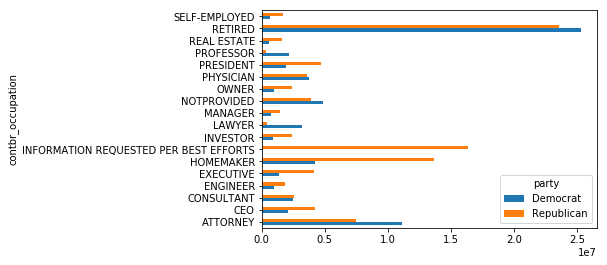

In [79]:
# 绘成柱状图
over_2mm.plot(kind='barh')

In [80]:
# 对Obama和Romner总出资额最高的职业和企业


In [81]:
# 先对选人进行分组
# 然后求和
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    # 根据key对totals进行降序排列
    return totals.sort_values(ascending=False)[n:] # 原书中用的order（）根据值排序的方法以及弃用了

In [82]:
# 然后根据职业和雇主进行聚合：
grouped = fec_mrbo.groupby('cand_nm')

In [83]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                    
Obama, Barack  PROFESSOR                                2165071.08
               CEO                                      2074974.79
               PRESIDENT                                1878509.95
               NOT EMPLOYED                             1709188.20
               EXECUTIVE                                1355161.05
               TEACHER                                  1250969.15
               WRITER                                   1084188.88
               OWNER                                    1001567.36
               ENGINEER                                  951525.55
               INVESTOR                                  884133.00
               ARTIST                                    763125.00
               MANAGER                                   762883.22
               SELF-EMPLOYED                             672393.40
               STUDENT                                   628099.75
         

In [84]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                
Obama, Barack  SIDLEY AUSTIN LLP                  168254.00
               REFUSED                            149516.07
               DLA PIPER                          148235.00
               HARVARD UNIVERSITY                 131368.94
               IBM                                128490.93
               GOOGLE                             125302.88
               MICROSOFT CORPORATION              108849.00
               KAISER PERMANENTE                  104949.95
               JONES DAY                          103712.50
               STANFORD UNIVERSITY                101630.75
               COLUMBIA UNIVERSITY                 96325.12
               UNIVERSITY OF CHICAGO               88575.00
               AT&T                                88132.12
               US GOVERNMENT                       87689.00
               MORGAN & MORGAN                     87250.00
               VERIZON                             85

### 对出资额分组

#### Liyongcut函数根据出资额的大小将数据离散化多个面元中

In [85]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [86]:
lables = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [87]:
lables

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

#### 然后根据候选人姓名以及面元标签对数据进行分组

In [88]:
grouped = fec_mrbo.groupby(['cand_nm', lables])

In [89]:
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
dtype: int64

In [90]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


#### 从上述可以看出，在小额赞助方面，奥巴马获得的数量多得多
#### 也可以对出资额求和并在面元内规格化，以便图形化显示两位候选人各种赞助额度的比例：

In [92]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [93]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [94]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [95]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


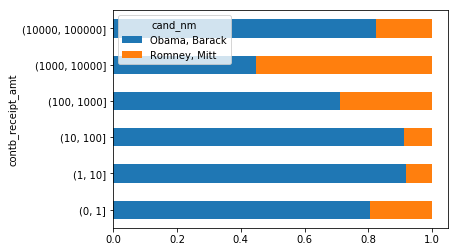

In [98]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### 根据州统计赞助信息

#### 首先是根据候选人和州进行聚合：

In [99]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [100]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [101]:
totals = totals[totals.sum(1) > 100000]

In [102]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


#### 如果各行除以总赞助额，就会得到各候选人在各州的总赞助比例：

In [103]:
percent = totals.div(totals.sum(1), axis=0)

In [104]:
percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


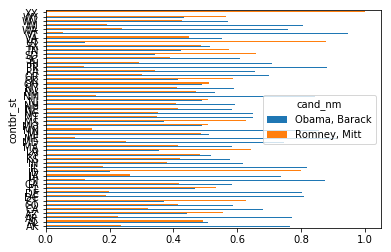

In [108]:
percent.plot(kind='barh')

In [111]:
from mpl_toolkits.basemap import Basemap, cm

In [112]:
from matplotlib import rcParams

In [113]:
from matplotlib.collections import LineCollection

In [115]:
from shapelib import ShapeFile  # 装不上包

ImportError: No module named shapelib